In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Creating a network:

In [2]:
maint = 10
np.random.seed(0)
A = np.random.choice((0, 1), size=(maint, maint))
A

array([[0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]])

Normaleiddio i'w wneud yn matrics stochastig.

In [3]:
symiau_rhes = A.sum(axis=1)
M = A / symiau_rhes[:, np.newaxis]
np.round(M, 2)

array([[0.  , 0.12, 0.12, 0.  , 0.12, 0.12, 0.12, 0.12, 0.12, 0.12],
       [0.33, 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.33],
       [0.  , 0.17, 0.17, 0.  , 0.  , 0.17, 0.17, 0.17, 0.17, 0.  ],
       [0.17, 0.  , 0.17, 0.  , 0.17, 0.17, 0.  , 0.17, 0.17, 0.  ],
       [0.  , 0.14, 0.  , 0.14, 0.14, 0.14, 0.14, 0.14, 0.  , 0.14],
       [0.  , 0.17, 0.17, 0.17, 0.17, 0.  , 0.17, 0.  , 0.  , 0.17],
       [0.33, 0.  , 0.33, 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.2 , 0.  , 0.  , 0.  , 0.2 , 0.2 , 0.  , 0.2 , 0.  ],
       [0.  , 0.14, 0.  , 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.  ],
       [0.2 , 0.2 , 0.  , 0.  , 0.2 , 0.  , 0.  , 0.2 , 0.2 , 0.  ]])

Creu graff o'r rhwydwaith.

In [4]:
G = nx.from_numpy_array(M, create_using=nx.DiGraph())

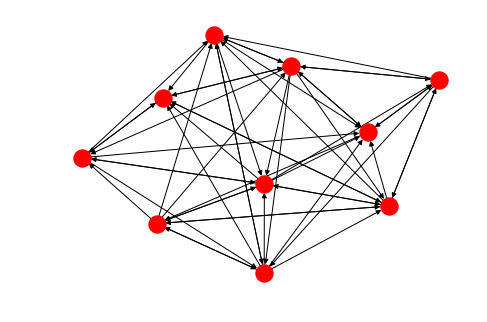

In [5]:
plt.figure()
nx.draw(G)
plt.savefig("graph.pdf")

Cyfrifo'r pagerank:

In [6]:
nx.pagerank(G, alpha=1)

{0: 0.11988980099060496,
 1: 0.11337734639341283,
 2: 0.09229073511280955,
 3: 0.08488079369061019,
 4: 0.12554165518523688,
 5: 0.09448445809607922,
 6: 0.09608526108105925,
 7: 0.09314704994034195,
 8: 0.09384213164925923,
 9: 0.08646076786058658}

Codi'r matrix i bwer uchel.

In [7]:
np.round(np.linalg.matrix_power(M, 2000000), 2)

array([[0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09],
       [0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09]])

Esbonio sut mae hyn yn cyfateb â'r problem gwerthoedd eigen.

In [8]:
gwerthoedd_e, fectorau_e = np.linalg.eig(M.T)
np.real(np.round(fectorau_e[:,0] / sum(fectorau_e[:,0]), 2))

array([0.12, 0.11, 0.09, 0.08, 0.13, 0.09, 0.1 , 0.09, 0.09, 0.09])